# NAME: Jyoti Kumari 
## INTERNSHIP UNDER THE SPARKS FOUNDATION GRIPAugust21
### Data Science and Buisness Analytics Intern at The Sparks Foundation

### From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

#### We will start by importing all the libraries required for the task

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

#### Now we will read the data from dataset provided

In [30]:
iris= pd.read_csv(r'C:\Users\ROHIT.LAPTOP-M9LNT1QB\Desktop\Iris.csv')
print("Data has been loaded sucessfully")

Data has been loaded sucessfully


### Data Overview

In [31]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Preprocessing

In [35]:
x = iris.drop(['Id','Species'],axis =1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K- Means Clustering

### A Cluster refers to a collection of data points aggregated together because of certain similarities.

### K- Means algorithm identifies k number of centroids , and then allocates every data point to the nearest cluster
### while keeping the centroids as small as possible.

#### Finding the optimum number of clusters for K-Means Classification

In [37]:
x = iris.iloc[:,[0,1,2,3,]].values

#### The elbow method runs K-Means clustering on the dataset for a rangeof values for K(say from 1-10) and then each value of K computers an average score for all the clusters

In [38]:
wcss =[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
        
wcss

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17762.657226173542,
 11451.167704301077,
 7934.569565242165,
 5914.824636081308,
 4561.675113691088,
 3644.3865095336387]

### Plotting the results onto a line graph, allowing us to observe "The Elbows"

Text(0, 0.5, 'Within Clusters Sum of Squares')

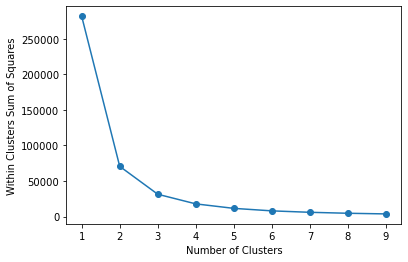

In [39]:
number_cluster = range(1,10)
plt.plot(number_cluster, wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')

In [40]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',
               max_iter =300,n_init =10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

### Clusters

In [46]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualizing the clusters

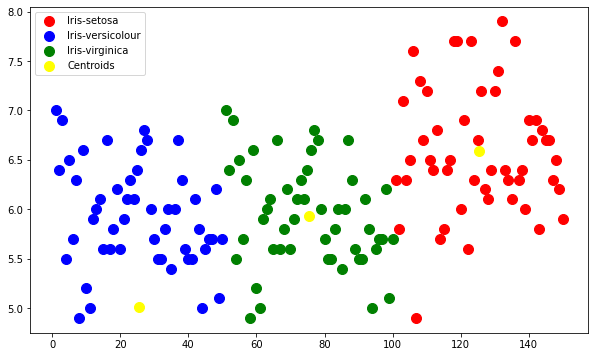

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans ==2, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans ==2, 1],
           s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')
plt.legend()